# How to inject artifical signals into K2 light curves

`lightkurve` will include a method to inject artificial signals (e.g. supernovae, planetary transits, rotation, flares) into K2, Kepler, TESS, and potentially ground based light curves. 

Let's download a K2 light curve of a galaxy. Currently, injection works on the light curve level, so we'll need to construct a light curve from the target pixel file.

In [1]:
from lightkurve import KeplerTargetPixelFile
import matplotlib.pyplot as plt
import numpy as np
import sncosmo

tpf = KeplerTargetPixelFile.from_archive(220381074)   #KeplerTargetPixelFile
lc = tpf.to_lightcurve(aperture_mask='all')           #KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()              

In [2]:
#tpf.plot()
tpf.time

array([2559.06829395, 2559.08872614, 2559.10915832, ..., 2637.73032869,
       2637.75076063, 2637.77119246])

In [3]:
#lc.plot();
#plt.ylim(0, 1.5)

This light curve of this galaxy is fairly smooth, but there may be some variability from the spacecraft motion and thermal fluctuations.
Now let's inject a supernova with the new `.inject` method, and plot the K2 light curve next to it. You'll need to install [sncosmo](http://sncosmo.readthedocs.io/) for this method to work.

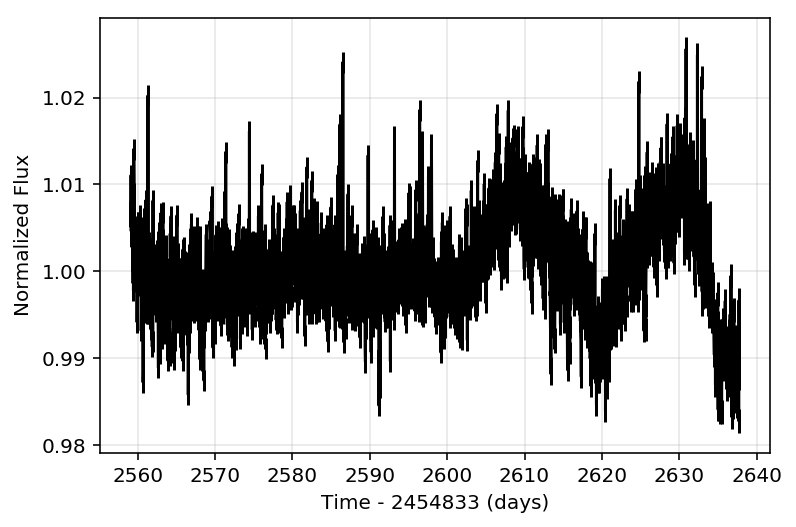

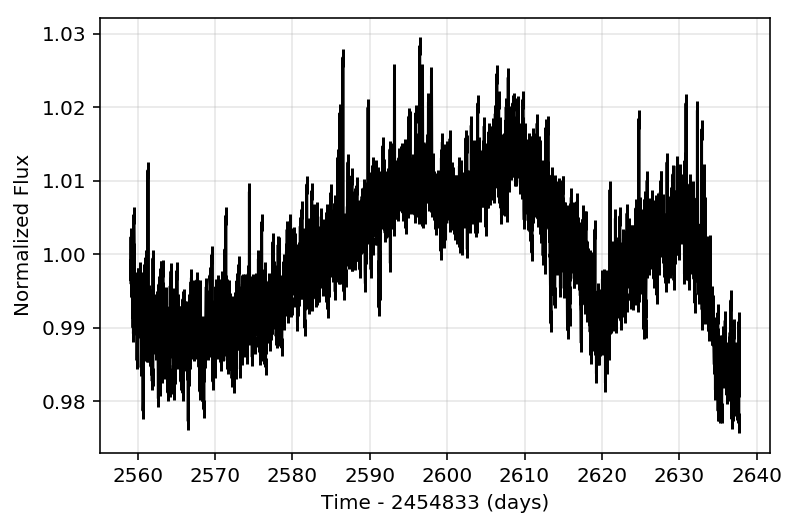

In [7]:
lcinj = lc.inject(t0=np.nanmedian(lc.time), source='hsiao', z=0.5, amplitude=5.e-5)

#K2 light curve
lc.plot()

#K2 light curve with injection
lcinj.plot()



We injected a supernova light curve into this galaxy!

['z', 't0', 'x0', 'x1', 'c']